# Linear Regression

**Linear regression** is a method of finding the **best straight line fitting to the given data** and also finding the best linear relationship between the variables. Least Squares Method is used to decide which line is the best fit the model.

A straight-line fit is a model of the form **y = ax + b** (a: slope, b: intercept). 

The slope and intercept of the data are contained in the model’s fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

**Predicted value of y is**: **$\hat{y}$**

$$\hat{y} = a + bx$$

## sklearn

In [9]:
from sklearn import linear_model

In [10]:
import pandas as pd

df = pd.read_excel("C:/Users/Owner/prices.xlsx")

In [11]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'price')

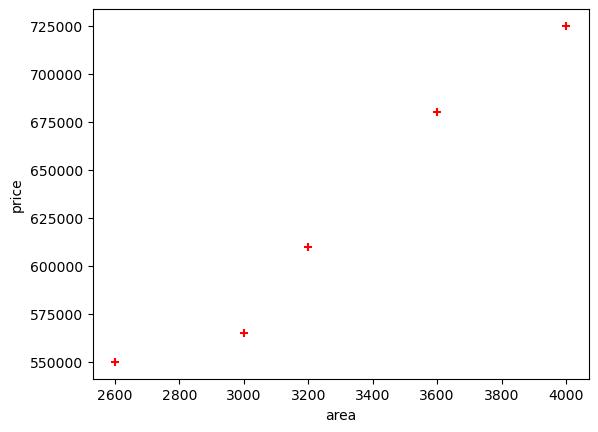

In [20]:
%matplotlib inline
plt.scatter(df.area, df.price, color = "red", marker = "+")
plt.xlabel("area")
plt.ylabel("price")

From this dispersion of data we understand that this distribution could be represented with linear regression model. 

## Create linear regression object

In [22]:
lm = linear_model.LinearRegression()#Ordinary least squares Linear Regression.

### Fitting the model

In [24]:
df[["area"]]

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [25]:
lm.fit(X= df[["area"]], y = df.price)#makine öğrendi

LinearRegression()

$$\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $$

$$ y = mx + b $$

### Predicting 

#### Coefficient

In [26]:
lm.coef_

array([135.78767123])

#### Intercept

In [27]:
lm.intercept_

180616.43835616432

In [28]:
lm.coef_*3300+lm.intercept_

array([628715.75342466])

In [29]:
lm.predict([[3300]])

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

## Canada per capita exercise

In [73]:
import pandas as pd

In [74]:
df = pd.read_csv("C:/Users/Owner/canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


#### What is the predicted net income in year 2020?

### Check out data

In [75]:
df = df.rename(columns={"year":"year", "per capita income (US$)":"per_capita"})

In [76]:
df.head()

,year,per_capita
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [83]:
df.shape

(47, 2)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        47 non-null     int64
 1   per_capita  47 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 696.0 bytes


In [85]:
df.describe()

,year,per_capita
count,47.000000,47.000000
mean,1993.000000,18920.063830
std,13.711309,12034.653132
min,1970.000000,3399.000000
25%,1981.500000,9526.500000
50%,1993.000000,16427.000000
75%,2004.500000,27458.500000
max,2016.000000,42676.000000


In [86]:
df["per_capita"] = df["per_capita"].astype("int")
#df.per_capita = round(df.per_capita, 0)

In [87]:
df.head()

,year,per_capita
0,1970,3399
1,1971,3768
2,1972,4251
3,1973,4804
4,1974,5577


In [88]:
df.dtypes

year          int64
per_capita    int32
dtype: object

#### EDA

In [35]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'income')

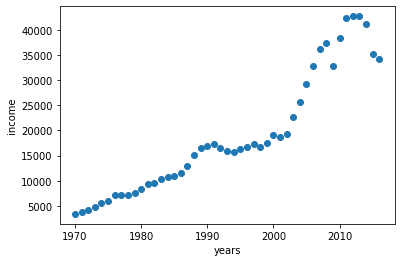

In [36]:
%matplotlib inline
plt.scatter(df["year"], df["per capita income (US$)"])
plt.xlabel("years")
plt.ylabel("income")

### Training a Linear Regression Model

#### X and y arrays

In [37]:
X = df[["year"]]
y = df["per capita income (US$)"]

### Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 101)

### Create linear regression object

In [40]:
from sklearn.linear_model import LinearRegression 

In [41]:
lm = LinearRegression()

### Fitting the model

In [42]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

In [43]:
lm.intercept_

-1459353.830812012

In [44]:
lm.coef_

array([741.22566658])

### Predictions from our Model

In [45]:
preds = lm.predict(X_test)

Text(0, 0.5, 'preds')

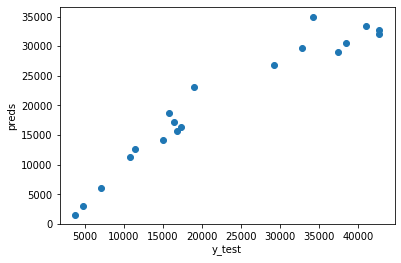

In [46]:
plt.scatter(y_test, preds)
plt.xlabel("y_test")
plt.ylabel("preds")

#### Residual Histogram

In [47]:
import seaborn as sns

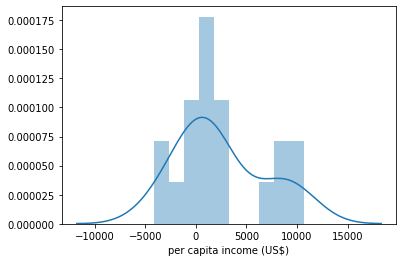

In [48]:
sns.distplot((y_test-preds), bins = 10)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [49]:
from sklearn import metrics
import numpy as np

In [50]:
metrics.mean_absolute_error(y_test, preds)

3572.266702238758

In [51]:
metrics.mean_squared_error(y_test, preds)

24094231.95989114

In [52]:
np.sqrt(metrics.mean_squared_error(y_test, preds))

4908.587572804538

In [53]:
metrics.r2_score(y_test, preds)

0.8607053728991608

In [59]:
def eval_metrics(y_test, preds):
    score = metrics.r2_score(y_test, preds)
    mae = metrics.mean_absolute_error(y_test, preds)
    mse = metrics.mean_squared_error(y_test, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [60]:
eval_metrics(y_test, preds)

r2_score: 0.8607053728991608 
 mae: 3572.266702238758 
 mse: 24094231.95989114 
 rmse: 4908.587572804538


In [245]:
# MSE hatası bu orneklemdeki datalardaki toplam hatalarin toplami.
# asıl bakılacak yer RMSE, büyük bir hata var. sentetik veri olduğundan zaar. 

#### Predictions

In [32]:
lm.predict([[2020]])

array([37922.01568348])

### Without split, train, test

In [33]:
lm.fit(df[["year"]], df["per capita income (US$)"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lm.predict([[2020]])

array([41288.69409442])

### Ridge Regression

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
from sklearn.linear_model import Ridge

In [37]:
from sklearn.linear_model import RidgeCV

#### Model set up

In [39]:
rm = Ridge(normalize = True)#Linear least squares with l2(ridge) regularization.

#### Model fit

In [40]:
rm.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [41]:
pred = rm.predict(X_test)

In [57]:
print("mae:", metrics.mean_absolute_error(y_test, pred))
print("mse:", metrics.mean_squared_error(y_test, pred))
print("rmse:", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("r2:", metrics.r2_score(y_test, pred))

mae: 7025.795623310038
mse: 89855004.2103081
rmse: 9479.187950996018
r2: 0.48052632159204345


In [58]:
accuracies = cross_val_score(estimator=rm, X=X_train, y=y_train, cv=10)
accuracies.mean()

NameError: name 'cross_val_score' is not defined

### Machine Learning Tutorial Python - 3: Linear Regression Multiple Variables

In [17]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [18]:
df = pd.read_csv("C:/Users/Owner/py/ML/2_linear_reg_multivariate/homeprices.csv")  
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### Data preprocessing

In [19]:
df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [20]:
df.bedrooms.median()

4.0

In [21]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

In [22]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### EDA

In [23]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'price')

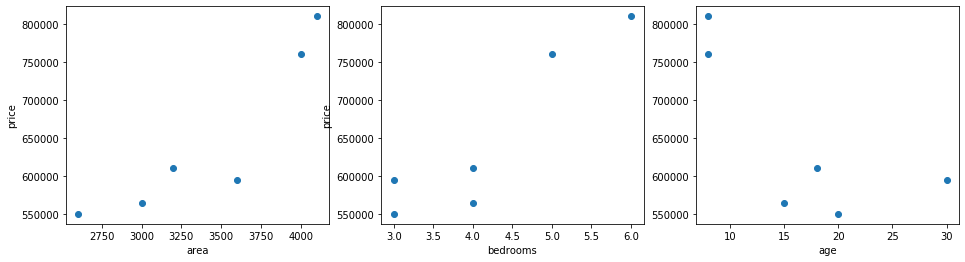

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))
ax[0].scatter(df.area, df.price)
ax[0].set_xlabel("area")
ax[0].set_ylabel("price")
ax[1].scatter(df.bedrooms, df.price)
ax[1].set_xlabel("bedrooms")
ax[1].set_ylabel("price")
ax[2].scatter(df.age, df.price)
ax[2].set_xlabel("age")
ax[0].set_ylabel("price")

### Building model

In [45]:
lm = linear_model.LinearRegression()

In [46]:
lm.fit(df[["area", "bedrooms", "age"]], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lm.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [51]:
lm.intercept_

221323.00186540408

In [52]:
lm.predict([[3000, 3, 40]])#Alanı 3000 mkare, 3 odalı, 40 yasında evin fiyatını buluyor

array([498408.25158031])

In [53]:
pip install word2number

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5586 sha256=fd5446ae5542cf679de09e7e5376c261e2f661b11f4e74a18ab33f8c94c5dba9
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\4b\c3\77\a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd

In [62]:
df = pd.read_csv("C:/Users/Owner/py/ML/2_linear_reg_multivariate/Exercise/hiring.csv")

In [63]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [64]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [65]:
df.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [66]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [67]:
import word2number as w2n

In [68]:
df.experience = df.experience.map({"one": 1, "two":2, "three":3, "four":4, "five":5, "six":6, "seven":7, "eight": 8, "nine":9, "ten":10, "eleven":11, "twelve":12, "thirteen":13})

In [69]:
df.experience

0     NaN
1     NaN
2     5.0
3     2.0
4     7.0
5     3.0
6    10.0
7    11.0
Name: experience, dtype: float64

In [70]:
df.experience = df.experience.fillna(1)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,1.0,8.0,9,50000
1,1.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [71]:
df.rename(columns = {"test_score(out of 10)": "test_score", "interview_score(out of 10)":"int_score", "salary($)":"salary"}, inplace = True)
df

,experience,test_score,int_score,salary
0,1.0,8.0,9,50000
1,1.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [72]:
df.dtypes

experience    float64
test_score    float64
int_score       int64
salary          int64
dtype: object

In [73]:
df.test_score.median()

8.0

In [74]:
df["test_score"]=df.test_score.fillna(df.test_score.median())
df

,experience,test_score,int_score,salary
0,1.0,8.0,9,50000
1,1.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

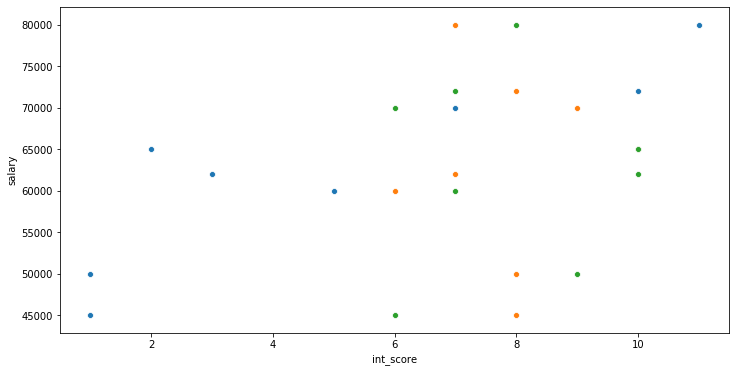

In [76]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=df.experience, y=df.salary )# bu dağılımdan verinin lineer regresyonla modellenebileceği anlaşılır
sns.scatterplot(x=df.test_score, y=df.salary )
sns.scatterplot(x=df.int_score, y=df.salary )

In [77]:
from sklearn import linear_model

In [78]:
lm = linear_model.LinearRegression()

In [79]:
lm.fit(df[["experience", "test_score", "int_score"]], df.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lm.predict([[2,9,6]])

array([51375.54064819])

In [28]:
lm.predict([[12,10,10]])

array([93523.67002192])

### Project

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn import linear_model

In [5]:
df=pd.read_csv("C:/Users/Owner/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/Ecommerce Customers.csv")

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
df.drop(labels = {"Email", "Address", "Avatar"}, axis =1, inplace=True)

In [10]:
df = df.rename(columns = {"Avg. Session Length":"session","Time on App":"apptime","Time on Website":"webtime", "Length of Membership":"member", "Yearly Amount Spent":"spent" })

In [11]:
df.head()

,session,apptime,webtime,member,spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


'matplotlib' is not recognized as an internal or external command,
operable program or batch file.


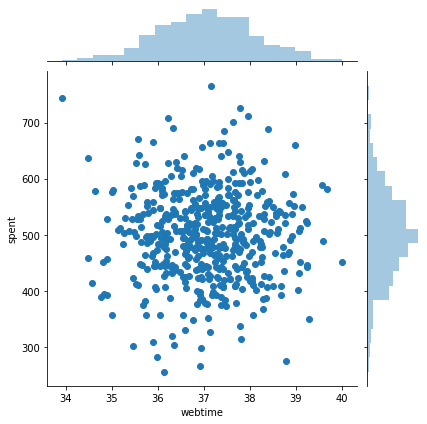

In [12]:
# More time on site, more money spent.
!matplotlib inline
sns.jointplot(df.webtime, df.spent) #Draw a plot of two variables with bivariate and univariate graphs.

In [13]:
df.corr()["spent"].sort_values()

webtime   -0.002641
session    0.355088
apptime    0.499328
member     0.809084
spent      1.000000
Name: spent, dtype: float64

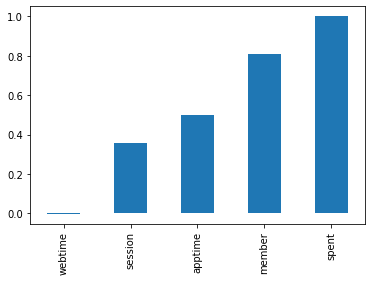

In [14]:
df.corr()["spent"].sort_values().plot.bar()

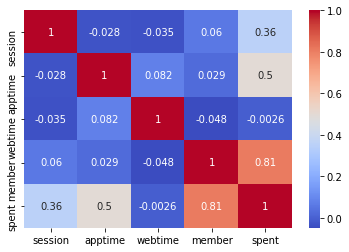

In [15]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

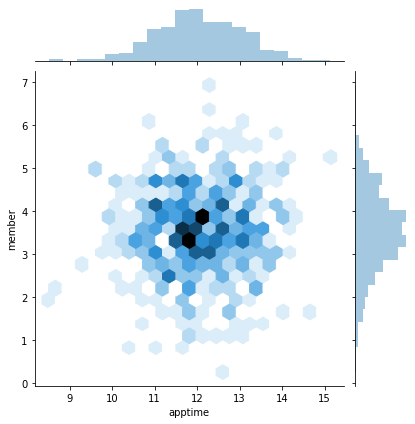

In [16]:
sns.jointplot(df.apptime, df.member, kind="hex")

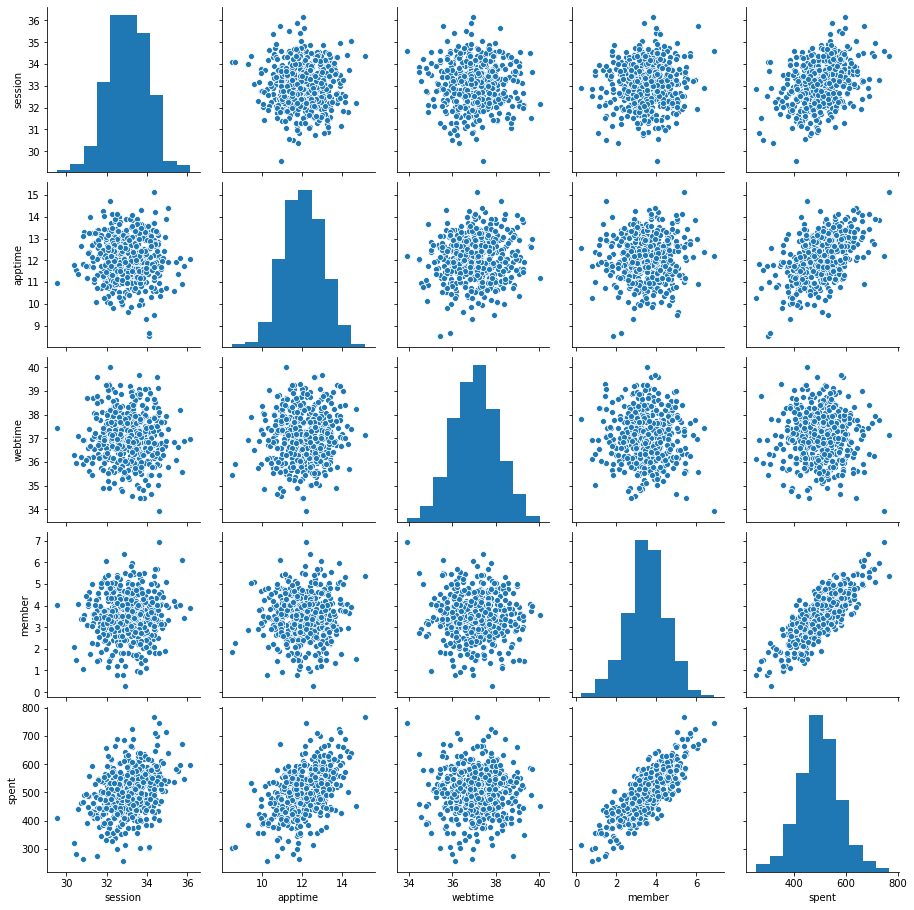

In [17]:
sns.pairplot(df)

In [18]:
#membership

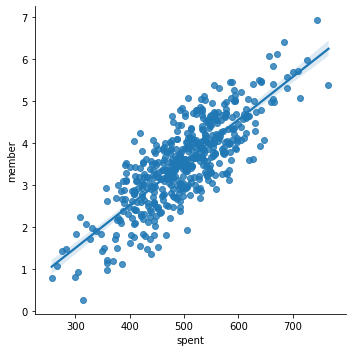

In [19]:
sns.lmplot("spent", "member", data = df)

In [20]:
X = df[["session", "apptime", "webtime", "member"]]
y = df.spent

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=101)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [27]:
preds = lm.predict(X_test)

Text(0, 0.5, 'preds')

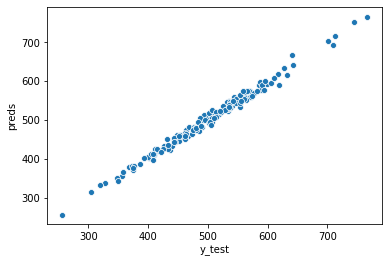

In [28]:
sns.scatterplot(y_test, preds)
plt.xlabel("y_test")
plt.ylabel("preds")

### Model score

Coefficient of determination of the prediction: $$R^{2} = 1-\frac uv$$ 

In [33]:
lm.score(X_test, y_test)

0.9890046246741232

### Model score with cross validation

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
accuracies = cross_val_score(estimator = lm, X=X_train, y=y_train, cv=10)
accuracies

array([0.96168892, 0.97817413, 0.97780864, 0.98800096, 0.98524763,
       0.98104704, 0.9812438 , 0.97586003, 0.9815827 , 0.97037093])

In [279]:
cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
-accuracies.mean()

-0.9781024800154375

In [280]:
my_dict = { 'Actual': y_test, 'Pred': preds }
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
237,376.336901,381.294454
281,560.443792,565.302547
246,563.446036,551.596514
346,488.387526,484.410296
433,434.144202,435.574556
179,501.100245,505.022609
211,548.518529,555.098511
252,426.154548,432.870467
289,467.427849,458.198681
423,461.112248,457.590999


In [281]:
from sklearn import metrics

In [282]:
def eval_metrics(y_test, preds):
    score = metrics.r2_score(y_test, preds)
    mae = metrics.mean_absolute_error(y_test, preds)
    mse = metrics.mean_squared_error(y_test, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [283]:
eval_metrics(y_test, preds)

r2_score: 0.9890046246741233 
 mae: 7.228148653430855 
 mse: 79.81305165097481 
 rmse: 8.933815066978655


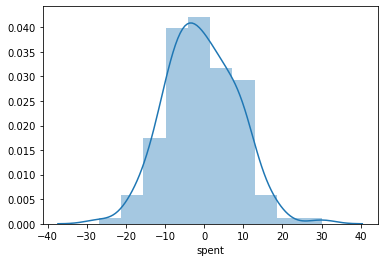

In [284]:
sns.distplot((y_test-preds), bins =10)

In [285]:
# I think company should focus on gathering more members since there is a strong relationship between this and spent numbers. 

In [286]:
coef=pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])
coef

,Coefficient
session,25.981550
apptime,38.590159
webtime,0.190405
member,61.279097


### Regularized Linear Models

### Ridge Regression

Ridge Regularization formula: $$\alpha\sum_{i=1}^n\theta^{2}_n$$

Ridge Regression cost function: $$J(\theta)=MSE(\theta)+\alpha \frac 12 \sum_{i=1}^n \theta^2_i $$

In [287]:
#Linear least squares with l2(ridge) regularization.

In [288]:
from sklearn.linear_model import Ridge

In [289]:
rm = Ridge(normalize=False)

In [290]:
rm.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Model evaluate

In [291]:
rm.coef_

array([25.90520654, 38.46858904,  0.1943649 , 61.10418198])

In [292]:
df.columns

Index(['session', 'apptime', 'webtime', 'member', 'spent'], dtype='object')

In [293]:
X.columns

Index(['session', 'apptime', 'webtime', 'member'], dtype='object')

In [294]:
coef_df = pd.DataFrame(data=rm.coef_, index=X.columns, columns = ["coef"])
coef_df

,coef
session,25.905207
apptime,38.468589
webtime,0.194365
member,61.104182


#### Predictions

In [295]:
preds = rm.predict(X_test)
preds[:5]

array([456.5390102 , 403.02426247, 409.52846485, 591.15911769,
       589.75184068])

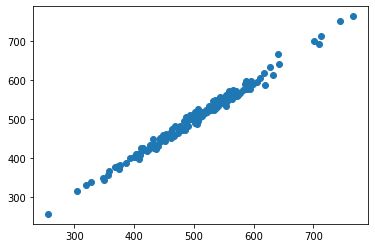

In [296]:
plt.scatter(y_test, preds)

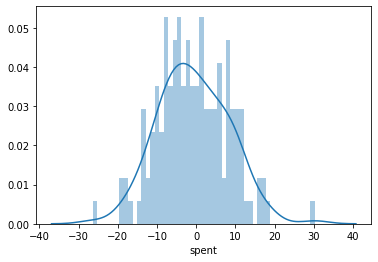

In [297]:
#residuals
sns.distplot((y_test-preds), bins = 50)

In [298]:
eval_metrics(y_test, preds)

r2_score: 0.9889531128737594 
 mae: 7.24629667486758 
 mse: 80.18696466997002 
 rmse: 8.954717453385674


In [299]:
accuracies = cross_val_score(estimator = rm, X=X_train, y=y_train, cv=10)
accuracies

array([0.96139796, 0.97832119, 0.97773133, 0.9880464 , 0.98516262,
       0.98127591, 0.98108495, 0.97564188, 0.98152408, 0.9708419 ])

In [300]:
accuracies.mean()

0.978102820740055

In [301]:
rm.alpha

1.0

In [302]:
rm = Ridge(alpha=1).fit(X_train, y_train)

In [303]:
y_pred = rm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9889531128737594 
 mae: 7.24629667486758 
 mse: 80.18696466997002 
 rmse: 8.954717453385674


In [304]:
np.linspace(1,5,5)

array([1., 2., 3., 4., 5.])

In [305]:
# optimal alfanın bulunması

In [306]:
alpha_space=np.linspace(0.1, 20,100)#Return evenly spaced numbers over a specified interval.
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [307]:
from sklearn.linear_model import RidgeCV

In [308]:
RidgeCV(alphas = alpha_space, cv=10)#Ridge regression with built-in cross-validation.

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [309]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)

In [310]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [311]:
ridgecv.alpha_

0.502020202020202

In [312]:
rm = Ridge(5.3).fit(X_train, y_train)
y_pred = rm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9885470971328076 
 mae: 7.400470786532466 
 mse: 83.13414512932475 
 rmse: 9.117792777274813


In [313]:
accuracies = cross_val_score(estimator=rm, X=X_train, y=y_train, cv=10)
accuracies.mean()

0.9778470344863008

In [314]:
rm.coef_

array([25.58203526, 37.9545031 ,  0.21074951, 60.36324066])

In [315]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

### Custom Transformers

#### Scaled version

In [316]:
# önce scale edilir. edilmese de olur. 

$$ \frac {X-min}{max-min}$$

$$ \frac {X-mean}{s}$$

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
scaler.fit(X_train)# Compute the mean and std to be used for later scaling.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
X_train.head()

,session,apptime,webtime,member
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382


In [65]:
X_train=scaler.transform(X_train)#Perform standardization by centering and scaling
                            #z score gibi, lasso ve ridge katsayı istediği için scale ettik. scale etmeden de kullanılabilir. 

In [40]:
X_test=scaler.transform(X_test)

In [41]:
a=pd.DataFrame(X_train, columns=X.columns)

In [42]:
a.head()

,session,apptime,webtime,member
0,-1.499941,-0.730834,-0.042984,0.274430
1,-1.163743,2.110040,-0.060729,0.200101
2,0.228480,-0.546783,0.048110,1.141258
3,0.846567,0.508317,0.072683,-0.887289
4,-0.004191,0.494168,0.580927,0.518859


In [43]:
# scaled_X_train = scaler.fit.transform(X_train) you can do fit_transform together
# no fit for X_test, but only transform

In [45]:
from sklearn.linear_model import Ridge

In [56]:
rm = Ridge()

In [57]:
# ridge_model = Ridge(normalize=True), scale edilmezse bu kullanılır

In [58]:
rm.fit(X_train, y_train)
y_pred = rm.predict(X_test)

In [59]:
from sklearn import metrics

In [60]:
def eval_metrics(y_test, preds):
    score = metrics.r2_score(y_test, preds)
    mae = metrics.mean_absolute_error(y_test, preds)
    mse = metrics.mean_squared_error(y_test, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)
eval_metrics(y_test, y_pred)

r2_score: 0.988956771254698 
 mae: 7.244352267448466 
 mse: 80.16040927389118 
 rmse: 8.953234570471789


In [64]:
accuraries = cross_val_score(estimator=rm, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.9780467332258453

In [333]:
# dir(ridge_model)

In [62]:
rm.alpha

1.0

In [63]:
rm = Ridge(3).fit(X_train, y_train)
y_pred = rm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9888163872545721 
 mae: 7.298002494669463 
 mse: 81.17942637162086 
 rmse: 9.009962617659458


In [336]:
alpha_space=np.linspace(0.1, 20,100)

In [337]:
# searching for best alpha
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [338]:
#best alpha
ridgecv.alpha_

0.703030303030303

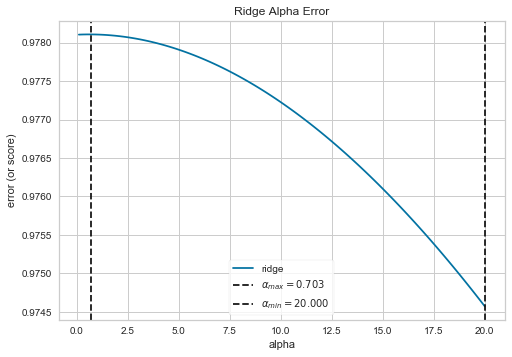

In [339]:
# findinfg alpha with yellowbrick
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [340]:
ridge_model = Ridge(3.7).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9887534725315297 
 mae: 7.319722714605984 
 mse: 81.63611074036366 
 rmse: 9.035270374502561


In [341]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()


0.9780071320959424

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


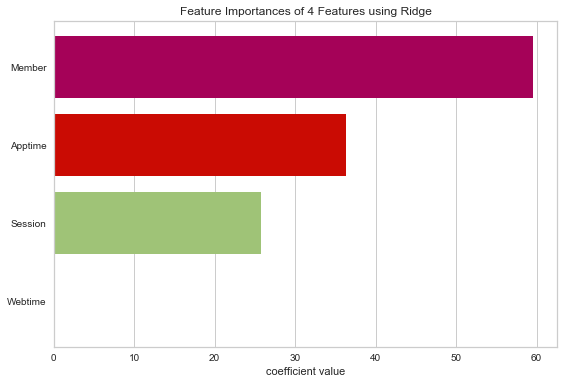

In [342]:
# from sklearn.linear_model import Lasso
# from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [343]:
ridge_model.coef_

array([25.76252022, 36.29071476,  0.1963405 , 59.59249495])

In [344]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

### Lasso Linear Regression

Lasso Regression cost function: $$J(\theta)=MSE(\theta)+\alpha \sum_{i=1}^n |\theta_i| $$

#### Training model

In [220]:
from sklearn.linear_model import Lasso

In [346]:
lasm = Lasso(normalize = False)
lasm.fit(X_train, y_train)
y_pred = lasm.predict(X_test)
eval_metrics(y_test, preds)

r2_score: 0.9889531128737594 
 mae: 7.24629667486758 
 mse: 80.18696466997002 
 rmse: 8.954717453385674


#### Model evaluate

In [347]:
lasm.coef_

array([25.00898835, 35.655947  ,  0.        , 59.25308628])

In [348]:
lasm.intercept_

498.7231164913073

In [225]:
coef_df = pd.DataFrame(data=lasm.coef_, index = X.columns, columns = ["coef"])
coef_df

,coef
session,24.949835
apptime,37.464179
webtime,0.000000
member,60.296283


#### Prediction

In [226]:
preds = lasm.predict(X_test)

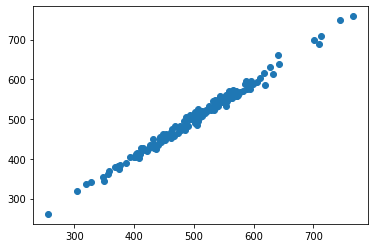

In [227]:
plt.scatter(y_test, preds)

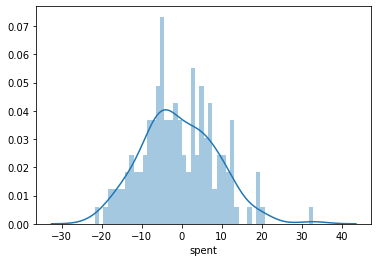

In [228]:
#residuals
sns.distplot((y_test-preds), bins = 50)

In [229]:
eval_metrics(y_test, preds)

r2_score: 0.9882390742109182 
 mae: 7.511351010019266 
 mse: 85.3700169068521 
 rmse: 9.239589650349853


In [230]:
accuraices=cross_val_score(estimator=lasm, X=X_train, y=y_train, cv=10)#Evaluate a score by cross-validation

In [231]:
accuracies.mean()

0.9778470344863008

In [234]:
lasm.alpha

1.0

In [349]:
from sklearn.linear_model import LassoCV

In [67]:
alpha_space = np.linspace(0.1, 20, 100)

In [ ]:
lamCV = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [351]:
lamCV.alpha_

0.1

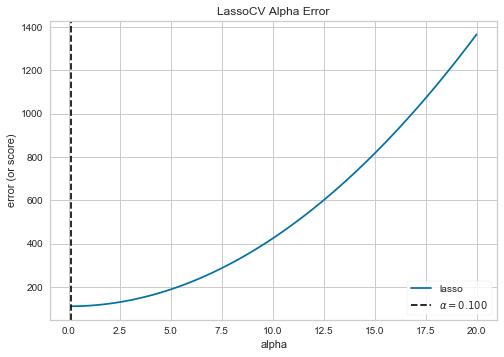

In [354]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [355]:
lasm=Lasso(0.01).fit(X_train, y_train)
y_pred = lasm.predict(X_test)
eval_metrics(y_test, preds)

r2_score: 0.9889531128737594 
 mae: 7.24629667486758 
 mse: 80.18696466997002 
 rmse: 8.954717453385674


In [356]:
lasm=Lasso(0.01).fit(X_train, y_train)

In [357]:
lasm.coef_

array([26.03257768, 36.66482345,  0.17569834, 60.19246725])

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


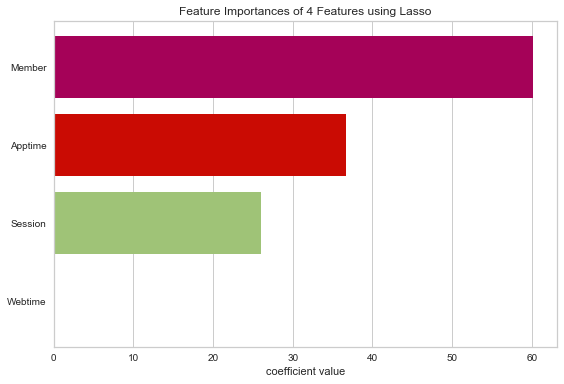

In [359]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasm, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [246]:
#pip install yellowbrick

# 4.Elastic Net

Elastic Net cost function: $$J(\theta)=MSE(\theta)+r\alpha \sum_{i=1}^n |\theta_i| + \frac{1-r}{2} \alpha\sum_{i=1}^n \theta_i^2$$

In [69]:
from sklearn.linear_model import ElasticNetCV #Elastic Net model with iterative fitting along a regularization path.
elastic_model = ElasticNetCV(alphas=alpha_space, l1_ratio=[.1, .5, .7,.9, .95, .99, 1])

In [70]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13...
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
             copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbo

In [71]:
elastic_model.l1_ratio_

1.0

In [72]:
elastic_model.alpha_

0.301010101010101

In [73]:
y_pred = elastic_model.predict(X_test)

In [74]:
eval_metrics(y_test,y_pred)

r2_score: -309.3368191708843 
 mae: 1500.8583186772867 
 mse: 2252667.85749401 
 rmse: 1500.8890223777407


In [75]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=elastic_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.9781068564798548

# Polynomial Regression

In [4]:
# we will use not scaled X (original X)
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(100, 3)

In [5]:
X.shape

(100, 1)

In [6]:
X.iloc[0]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [7]:
poly_features[0]

array([1.        , 0.84764162, 0.71849632])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

NameError: name 'train_test_split' is not defined

In [9]:
model = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [88]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
y_pred=model.predict(X_test)

In [90]:
eval_metrics(y_test, y_pred)

r2_score: 0.9843529333146764 
 mae: 0.48967980448041754 
 mse: 0.44175055104042776 
 rmse: 0.6646431757269669


In [91]:
accuraries = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.9814092804779211

In [92]:
accuraries

array([0.98721689, 0.99303246, 0.9905022 , 0.98369201, 0.98423858,
       0.93187129, 0.9907614 , 0.99330359, 0.96496016, 0.99451422])

In [93]:
#y_pred_train=model.predict(X_train)
#eval_metrics(y_train, y_pred_train)

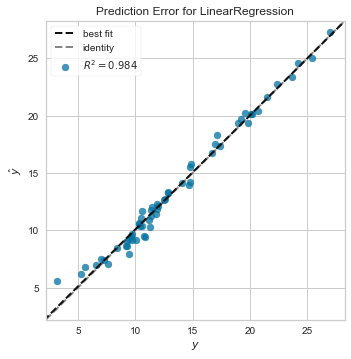

In [94]:
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

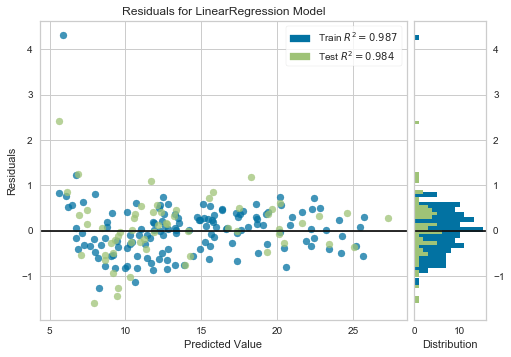

In [95]:

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [96]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=5)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(200, 56)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [98]:
model = LinearRegression()

In [99]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
y_pred=model.predict(X_test)

In [101]:
eval_metrics(y_test, y_pred)

r2_score: 0.5764805665168882 
 mae: 0.7800817064893387 
 mse: 11.956870056224584 
 rmse: 3.457870740242409


In [102]:
y_pred=model.predict(X_train)
eval_metrics(y_train, y_pred)

r2_score: 0.996995221555886 
 mae: 0.22000784947578522 
 mse: 0.0790742155825717 
 rmse: 0.2812013790552452


In [103]:
accuraries = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8853463803374384